The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST-data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz
0.9137
prediction : [7], label : 7


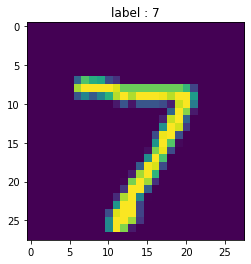

In [2]:
# importing libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 

learn = tf.contrib.learn 
tf.logging.set_verbosity(tf.logging.ERROR)

# importing dataset using MNIST 
# this is how mnist is used mnist contain test and train dataset 
mnist = learn.datasets.load_dataset('mnist') 
data = mnist.train.images 
labels = np.asarray(mnist.train.labels, dtype = np.int32) 
test_data = mnist.test.images 
test_labels = np.asarray(mnist.test.labels, dtype = np.int32) 

max_examples = 10000
data = data[:max_examples] 
labels = labels[:max_examples] 

# displaying dataset using Matplotlib 
def display(i): 
	img = test_data[i] 
	plt.title('label : {}'.format(test_labels[i])) 
	plt.imshow(img.reshape((28, 28))) 
	
# img in tf is 28 by 28 px 
# fitting linear classifier 
feature_columns = learn.infer_real_valued_columns_from_input(data) 
classifier = learn.LinearClassifier(n_classes = 10, 
									feature_columns = feature_columns) 
classifier.fit(data, labels, batch_size = 100, steps = 1000) 

# Evaluate accuracy 
classifier.evaluate(test_data, test_labels) 
print(classifier.evaluate(test_data, test_labels)["accuracy"]) 

prediction = classifier.predict(np.array([test_data[0]], 
										dtype=float), 
										as_iterable=False) 
print("prediction : {}, label : {}".format(prediction, 
	test_labels[0]) ) 

if prediction == test_labels[0]: 
	display(0) 